Q1. What is the mathematical formula for a linear SVM?


A1. The mathematical formula for a linear Support Vector Machine (SVM) can be represented as follows:

Given a set of training examples {(x₁, y₁), (x₂, y₂), ..., (xn, yn)}, where xᵢ represents the input features and yᵢ is the corresponding class label (either +1 or -1), the goal of a linear SVM is to find a hyperplane in the feature space that maximally separates the two classes.

The decision function of a linear SVM can be written as:

f(x) = sign(w·x + b)

where w is the weight vector perpendicular to the hyperplane, · denotes the dot product, and b is the bias term.

The weight vector w and bias term b are learned through the optimization process of the SVM.



Q2. What is the objective function of a linear SVM?


A2. The objective function of a linear SVM aims to find the optimal hyperplane that maximizes the margin between the two classes while minimizing the classification errors. It can be defined as:

minimize ½ ||w||²

subject to yᵢ(w·xᵢ + b) ≥ 1 for all training examples (xᵢ, yᵢ)

Here, ||w|| represents the Euclidean norm of the weight vector w, and the constraint ensures that the decision function correctly classifies each training example with a margin of at least 1.



Q3. What is the kernel trick in SVM?


A3. The kernel trick in SVM is a technique that allows nonlinear relationships to be learned using a linear classifier. The idea is to implicitly map the input data into a higher-dimensional feature space where the classes become linearly separable. This mapping is achieved by using a kernel function.

Instead of explicitly computing the coordinates of data points in the higher-dimensional space, the kernel function calculates the dot products between the data points in the original feature space as if they were in the higher-dimensional space. This allows for efficient computation and avoids the need to explicitly define the transformation.

Common kernel functions include the linear kernel (which represents the original linear SVM formulation), polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel. The choice of kernel depends on the characteristics of the data and the problem at hand.



Q4. What is the role of support vectors in SVM Explain with example

A4. Support vectors play a crucial role in SVM. These are the training examples that lie closest to the decision boundary (hyperplane) and directly influence its position. Support vectors are the points that are most difficult to classify correctly or those that lie within the margin.

Once the SVM optimization process is complete, the decision boundary (hyperplane) is determined by a subset of the training examples, which are the support vectors. These support vectors define the orientation and position of the hyperplane.

Support vectors have non-zero coefficients in the optimization problem and are essential for determining the decision function. They have a direct impact on the margin and the separation of the classes. In cases where new examples need to be classified, only the support vectors are used to make predictions, making SVM computationally efficient.

For example, consider a binary classification problem with two classes, represented by red and blue points in a two-dimensional feature space. The support vectors are the points lying closest to the decision boundary (hyperplane), as they define the position and orientation of the hyperplane. These support vectors will be used to classify new data points based on their proximity to the hyperplane.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

1. Hyperplane
In SVM, a hyperplane is a decision boundary that separates the data into different classes. In a binary classification problem, a hyperplane is a line that separates the data points of one class from the data points of the other class. In a multiclass classification problem, a hyperplane is a plane or a higher-dimensional hyperplane that separates the data points of each class from the data points of the other classes.



In [2]:
from IPython.display import Image

Image(url='https://datamites.com/blog/wp-content/uploads/2019/09/SVM-Planes-and-Hyperplane.jpg')



In this example, the blue and red dots represent two different classes of data points. The hyperplane is a line that separates the blue dots from the red dots. Any new data point that falls on the blue side of the line will be classified as belonging to the blue class, while any new data point that falls on the red side of the line will be classified as belonging to the red class.



2. Marginal Plane
The marginal plane is the hyperplane that is equidistant from the support vectors on each side. The distance between the marginal plane and the closest support vector is called the margin, and it is maximized in SVM.

3. Hard Margin
In SVM, the hard margin method is used when the data is linearly separable, meaning that a hyperplane can be found that perfectly separates the data into two classes. The hard margin method tries to find the hyperplane that maximizes the margin while ensuring that all data points are correctly classified.

4. Soft Margin
In SVM, the soft margin method is used when the data is not linearly separable, meaning that a hyperplane cannot be found that perfectly separates the data into two classes. The soft margin method allows for some misclassification of the data points in order to find a hyperplane that separates the data as well as possible.

In [3]:
Image(url='https://miro.medium.com/max/1172/1*PiGj6vEyBhxbXfK4bzwwTg.png')



Q6. SVM Implementation through Iris dataset.

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.
Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [4]:
# Load IRIS dataset from sklearn
from sklearn.datasets import load_iris
dataset = load_iris()

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
import pandas as pd
X =pd.DataFrame(dataset.data, columns=dataset.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
import pandas as pd
X =pd.DataFrame(dataset.data, columns=dataset.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y = pd.DataFrame(dataset.target, columns=['class'])
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [10]:
# Train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)
xtrain.shape

(100, 4)

In [11]:
xtest.shape

(50, 4)

In [12]:
# Train a linear SVM classifier on the training set
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0)
svm.fit(xtrain, ytrain.values.flatten())


SVC(kernel='linear')

In [13]:
# Predict the labels for the testing set
y_pred = svm.predict(xtest)

# Compute the accuracy of the model on the testing set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 1.0


<AxesSubplot:>

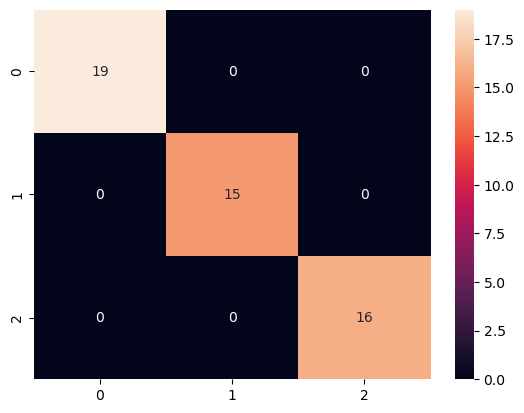

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,y_pred)
sns.heatmap(cf,annot=True)

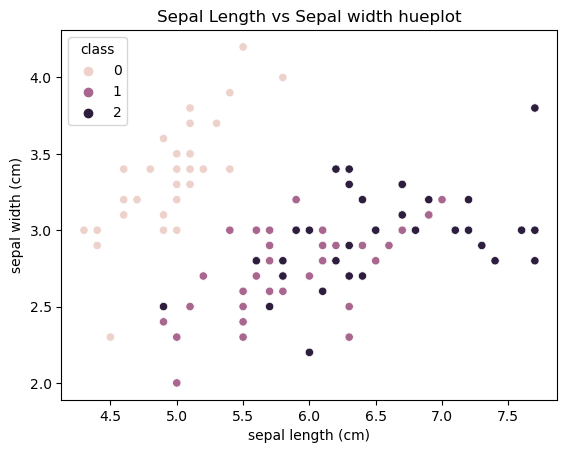

In [15]:
# Plot the decision boundaries of the trained model using two of the features
import seaborn as sns
import matplotlib.pyplot as plt
df_train = pd.concat([xtrain,ytrain],axis=1)
sns.scatterplot(data = df_train, x = 'sepal length (cm)',y='sepal width (cm)',hue='class')
plt.title('Sepal Length vs Sepal width hueplot')
plt.show()


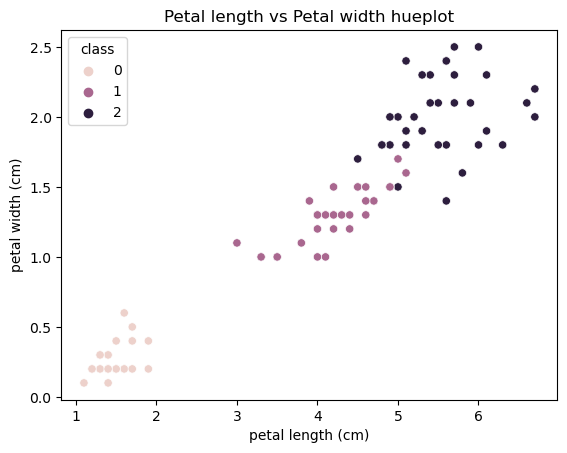

In [16]:
# Plot the decision boundaries of the trained model using two of the features
import seaborn as sns
import matplotlib.pyplot as plt
df_train = pd.concat([xtrain,ytrain],axis=1)
sns.scatterplot(data = df_train, x = 'petal length (cm)',y='petal width (cm)',hue='class')
plt.title('Petal length vs Petal width hueplot')
plt.show()

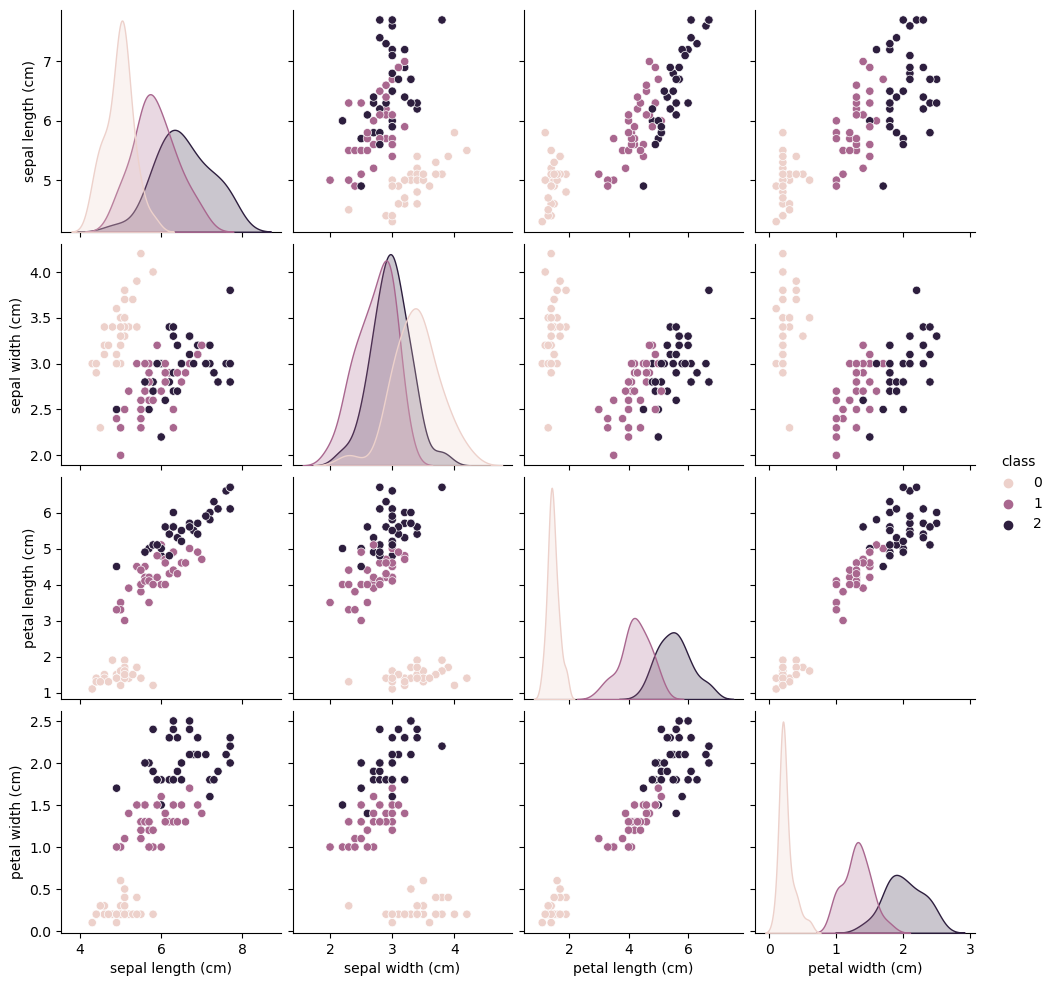

In [17]:
# Pairplot
sns.pairplot(df_train,hue='class')
plt.show()

In [18]:
import numpy as np
C = np.linspace(0.01,10,20)
C

array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])

In [19]:
from sklearn.metrics import classification_report
acc = []
for i in C:
    model = SVC(kernel='linear', C=i)
    model.fit(xtrain,ytrain.values.flatten())
    ytest_pred = model.predict(xtest)
    acc.append(accuracy_score(ytest,ytest_pred))
    print(f'C Value : {i}\n')
    print(classification_report(ytest,ytest_pred))
    print('\n======================================================================\n')


C Value : 0.01

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



C Value : 0.5357894736842106

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



C Value : 1.0615789473684212

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00      

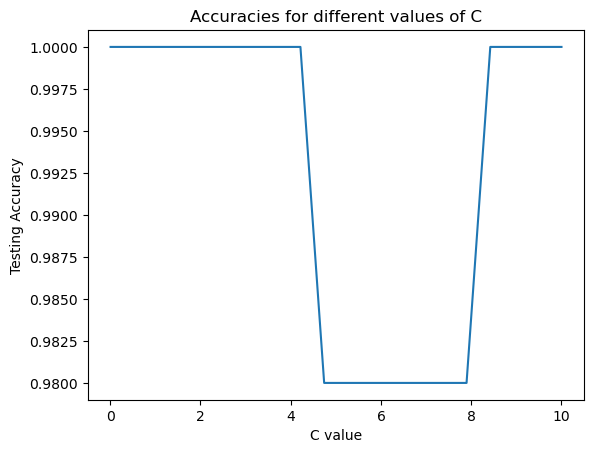

In [20]:
import matplotlib.pyplot as plt
plt.plot(C, acc)
plt.xlabel('C value')
plt.ylabel('Testing Accuracy')
plt.title('Accuracies for different values of C')
plt.show()